In [9]:
import torch
import torchvision
import torch.nn as nn
from torchsummary import summary

import torch.nn.functional as F

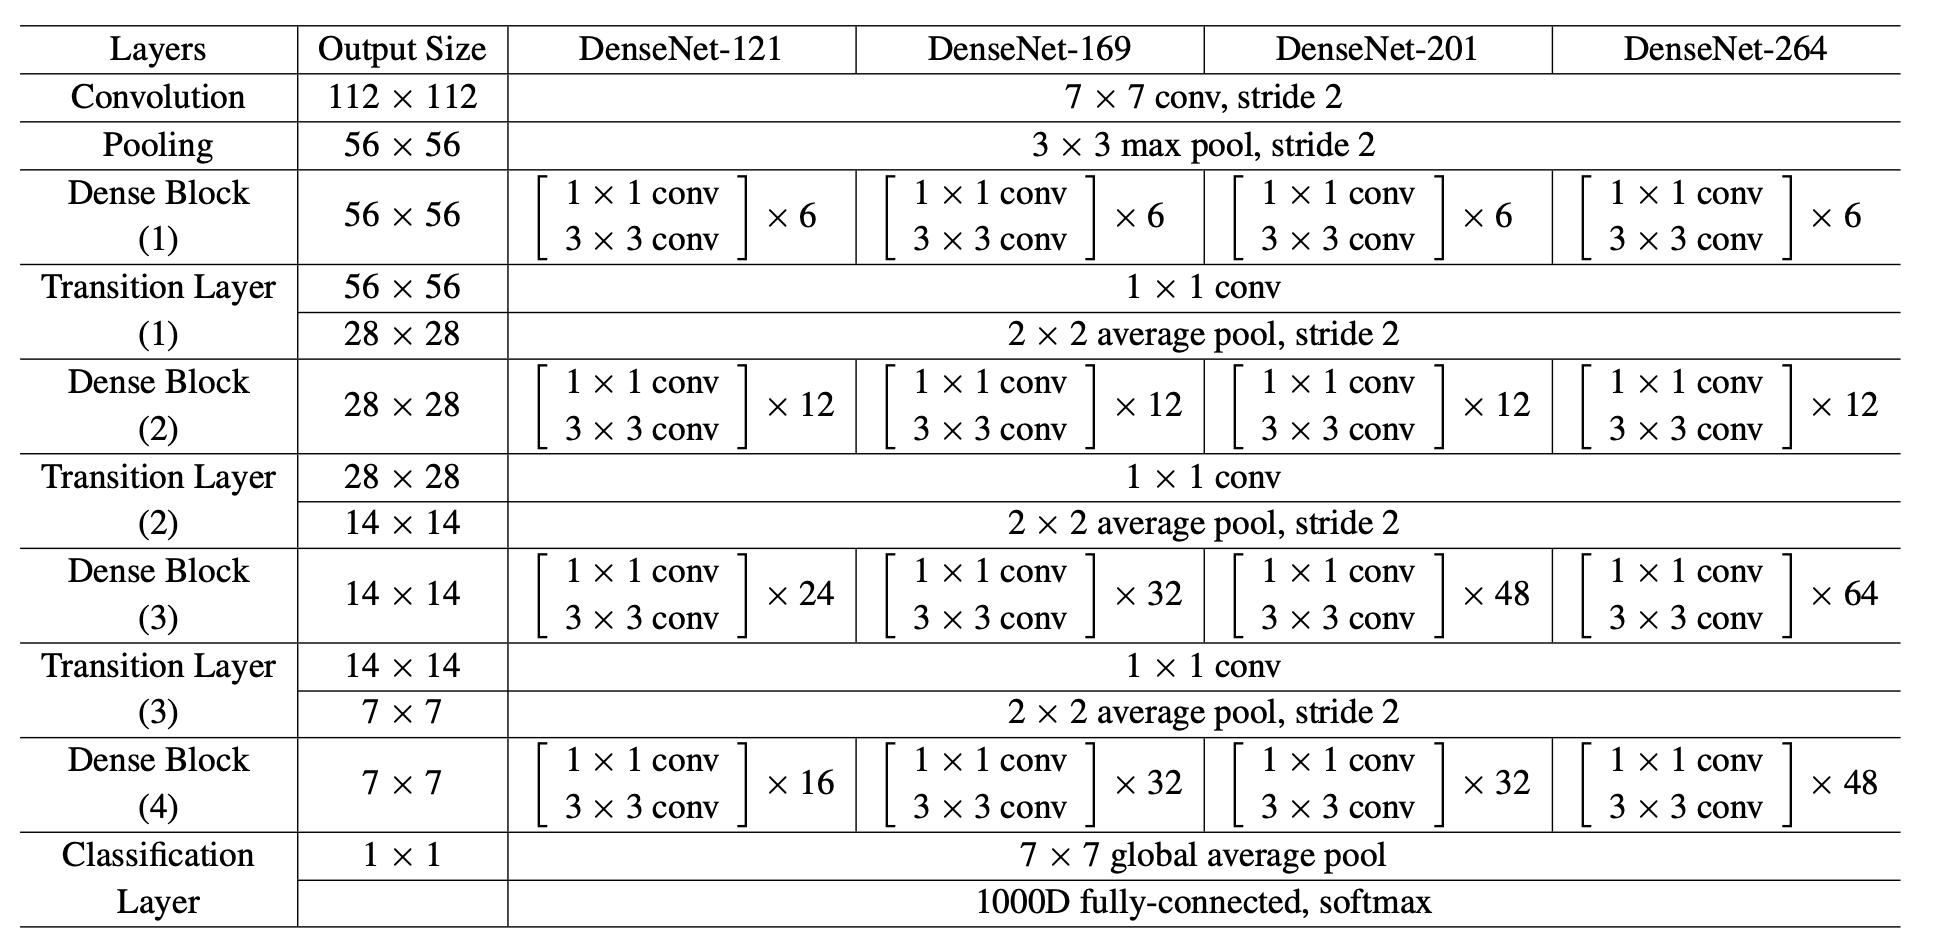

In [89]:
#Densenet-121
repetitions = 6, 12, 24, 16
f=32
n_classes=10

class ConvBlock(nn.Module):
  def __init__(self,in_channels,f,k=1,s=1):
    super().__init__()   
    self.bn=nn.BatchNorm2d(in_channels)
    self.relu=nn.ReLU()
    self.conv=nn.Conv2d(in_channels=in_channels,out_channels=f,kernel_size=k,stride=s,padding=(k-1)//2)
  def forward(self,x):
  
    x=self.bn(x)
    x=self.relu(x)
    x=self.conv(x)
    return x


class DenseBlock(nn.Module):
  def __init__(self,in_channels=input,f=f):
    super().__init__()
    
    self.convblock1=ConvBlock(input,4*f)
    self.convblock2=ConvBlock(4*f,f,k=3)
  def forward(self,input):
    x=self.convblock1(input)
    output=self.convblock2(x)
    output= torch.cat([input, output], 1)
    #print(output.shape)

    
    return output


class TransitionLayer(nn.Module):
  def __init__(self,in_channels=input,f=f):
    super().__init__()
    self.input=input
    self.convblock_trans=ConvBlock(input,f)
    self.avgpool2d =nn.AvgPool2d(kernel_size=2, stride=2, padding=0)

  def forward(self,x):
   
    x=self.convblock_trans(x)
    x=self.avgpool2d(x)
   
    return x





layers = []
layers.append(nn.Conv2d(in_channels=3,out_channels=64,kernel_size=7,stride=2,padding=3))
layers.append(nn.MaxPool2d(3, stride=2,padding=1))

for idx,r in enumerate(repetitions):
  input=64 if idx==0 else input
  for i in range(0,r):
      layers.append(DenseBlock(input,f))
      input+=f
   
  if idx!=3:
    layers.append(TransitionLayer(input,input//2))
    input=input//2

layers.append(torch.nn.AdaptiveAvgPool2d(output_size=(1, 1)))
layers.append(nn.Flatten())
layers.append(nn.Linear(1024,n_classes))
Densenet=nn.Sequential(*layers)
input_sample = torch.rand((1,3, 224, 224))
out=Densenet(input_sample)

In [90]:
print(out.shape)


torch.Size([1, 10])
